<a href="https://colab.research.google.com/github/farrelrassya/Practical-Statistics-for-Data-Scientist-Books/blob/main/PracticalStatisticsChapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
pip install wquantiles

In [26]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [27]:
# Table 1-2
state = pd.read_csv('state.csv')
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


##The **mean** (or average)
is the most basic measure of central location, calculated by summing all values and dividing by the number of values. For example, for the set $\{3, 5, 1, 2\}$, the mean is:

$$
\bar{x} = \frac{3 + 5 + 1 + 2}{4} = \frac{11}{4} = 2.75
$$

In general, the mean for a set of $n$ values $x_1, x_2, \dots, x_n$ is:

$$
\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

Here, $N$ (or $n$) represents the total number of observations. In statistics, it is capitalized ($N$) when referring to a population and lowercase ($n$) when referring to a sample from a population. However, in data science, this distinction is often not emphasized.

A **trimmed mean** is a variation of the mean where a fixed number of the smallest and largest sorted values are omitted before calculating the average. For sorted values $x_1 \leq x_2 \leq \dots \leq x_n$, the trimmed mean with $p$ values removed from each end is:

$$
\text{Trimmed Mean} = \bar{x} = \frac{\sum_{i = p + 1}^{n - p} x_i}{n - 2p}
$$


A **trimmed mean** reduces the impact of extreme values by removing a fixed number of the smallest and largest values before calculating the average. For example, in international diving, the highest and lowest scores from five judges are discarded, and the final score is the average of the remaining three scores. This method helps prevent any single judge from disproportionately influencing the final result. Trimmed means are widely used and are often preferred over the ordinary mean. For more details, refer to “Median and Robust Estimates” on page 10.

Another type of mean is the **weighted mean**, which accounts for the varying importance or reliability of each data point. It is calculated by multiplying each data value $ x_i $ by a corresponding weight $ w_i $ summing these products, and then dividing by the sum of the weights. The formula for the weighted mean is:

$$
\bar{x}_{\text{weighted}} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}
$$

There are two main reasons to use a weighted mean:

- **Variable Reliability**: Some values are inherently more variable or less reliable than others. By assigning lower weights to highly variable observations, their influence on the mean is reduced. For instance, when averaging data from multiple sensors, less accurate sensors can be downweighted to minimize their impact on the overall average.

- **Unequal Representation**: The collected data may not equally represent all groups of interest. In such cases, weights can be assigned to give more importance to underrepresented groups, ensuring that the weighted mean accurately reflects the entire population. For example, in an online experiment, if certain user groups are underrepresented, assigning higher weights to their data can correct for this imbalance.


In [28]:
print(state['Population'].mean())

6162876.3


In [29]:
print(trim_mean(state['Population'], 0.1))

4783697.125


In [30]:
print(state['Population'].median())

4436369.5


In [31]:
print(state['Murder.Rate'].mean())

4.066


In [32]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [33]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


## Estimates of Variability

**Location** is just one dimension in summarizing a feature. A second dimension, **variability** (also referred to as **dispersion**), measures whether the data values are tightly clustered or spread out. Variability is fundamental to statistics and involves:

- **Measuring Variability**: Quantifying how much the data points differ from each other.
- **Reducing Variability**: Implementing methods to minimize fluctuations in data.
- **Distinguishing Random from Real Variability**: Identifying whether variations are due to random chance or underlying factors.
- **Identifying Sources of Variability**: Determining the different factors contributing to the spread in data.
- **Making Decisions in the Presence of Variability**: Making informed choices despite the presence of data fluctuations.

Understanding variability is crucial for assessing the reliability and consistency of data, complementing measures of central location to provide a comprehensive summary of a dataset.


## Standard Deviation and Related Estimates

The most widely used measures of **variation** are based on the deviations between the estimate of location (such as the mean or median) and the observed data. Consider the dataset $\{1, 4, 4\}$:
- **Mean**: $\bar{x} = 3$
- **Median**: $4$

The **deviations** from the mean are:
- $1 - 3 = -2$
- $4 - 3 = 1$
- $4 - 3 = 1$

These deviations indicate how dispersed the data is around the central value.

### Mean Absolute Deviation

A straightforward way to quantify variability is the **mean absolute deviation (MAD)**, which is the average of the absolute values of the deviations from the mean. Since the sum of the raw deviations from the mean is zero, taking absolute values provides a meaningful measure of dispersion.

For the example above:
- Absolute deviations: $\{2, 1, 1\}$
- MAD: $\frac{2 + 1 + 1}{3} = 1.33$

The formula for the mean absolute deviation is:

$$
\text{Mean Absolute Deviation} = \frac{\sum_{i=1}^{n} |x_i - \bar{x}|}{n}
$$

where $\bar{x}$ is the sample mean.

### Variance and Standard Deviation

The **variance** and **standard deviation** are the most well-known estimates of variability, based on squared deviations from the mean.

- **Variance ($s^2$)**: The average of the squared deviations from the mean.

$$
\text{Variance} = s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}
$$

- **Standard Deviation ($s$)**: The square root of the variance, providing a measure of variability in the same units as the original data.

$$
\text{Standard Deviation} = s = \sqrt{\text{Variance}} = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}}
$$

### Why Prefer Standard Deviation?

While the **mean absolute deviation** is intuitive, the **standard deviation** is preferred in statistics due to its mathematical properties and convenience, especially in statistical modeling. Squaring the deviations simplifies many theoretical derivations and calculations, making standard deviation a cornerstone in statistical analysis.

---

**Key Points:**
- **Mean Absolute Deviation (MAD)**: Average of absolute deviations from the mean.
- **Variance ($s^2$)**: Average of squared deviations from the mean, using $n-1$ for an unbiased estimate.
- **Standard Deviation ($s$)**: Square root of the variance, same units as the data.
- **Preference for Standard Deviation**: Enhanced mathematical convenience and suitability for statistical models.

Understanding these measures of variability is essential for assessing the spread and reliability of your data, complementing measures of central location like the mean and median.


In [34]:
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [35]:
print(state['Population'].std())

6848235.347401142


In [36]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


In [37]:
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817) ##0.6744897501960817 is the 75th percentile of the standard normal distribution.

3849876.1459979336
3849876.1459979336


## Percentiles and Boxplots

In the section “Estimates Based on Percentiles” on page 16, we explored how **percentiles** can be used to measure the spread of data. Percentiles are also valuable for summarizing the entire distribution of a dataset. Commonly reported percentiles include:

- **Quartiles**: The 25th, 50th (median), and 75th percentiles.
- **Deciles**: The 10th, 20th, ..., up to the 90th percentiles.

### Importance of Percentiles

- **Summarizing Distribution**: Percentiles provide a detailed summary of the data distribution beyond central tendency measures like the mean or median.
- **Understanding Tails**: Percentiles are especially valuable for summarizing the tails (the outer ranges) of the distribution. For example, the term **one-percenters** refers to individuals in the top **99th percentile** of wealth, highlighting those in the extreme upper end.

### Application in Boxplots

**Boxplots** are graphical representations that utilize percentiles to summarize data distributions. Specifically, they display:

- **Minimum**: The smallest data point excluding outliers.
- **First Quartile (Q1)**: The 25th percentile.
- **Median (Q2)**: The 50th percentile.
- **Third Quartile (Q3)**: The 75th percentile.
- **Maximum**: The largest data point excluding outliers.

Boxplots provide a visual summary of the data's central tendency, variability, and potential outliers by leveraging key percentiles.

---

**Key Points:**
- **Percentiles** are essential for understanding the distribution and spread of data.
- **Quartiles** and **deciles** are specific types of percentiles used for detailed summaries.
- **Boxplots** effectively visualize the distribution of data using percentiles, highlighting central values and variability.

Understanding percentiles and their application in boxplots is crucial for effective exploratory data analysis, allowing for insights into data distribution and the identification of outliers.



In [38]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [39]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


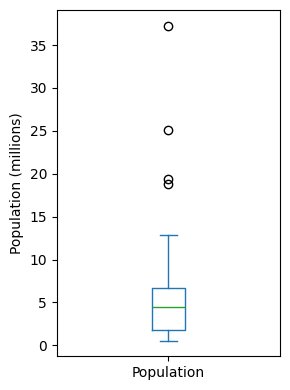

In [40]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

##Frequency Table and Histograms
The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method value_counts returns a frequency table.

In [41]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


In [42]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation', observed=False):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

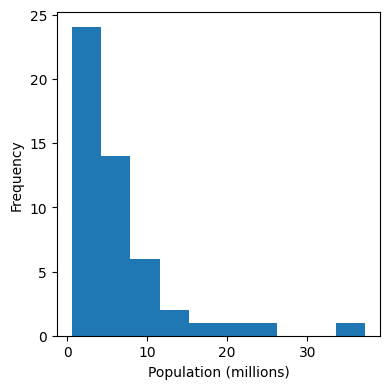

In [43]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

## Density Plots and Estimates

Related to the **histogram**, a **density plot** presents the distribution of data values as a continuous line. Unlike histograms, which use discrete bins to represent data frequencies, density plots provide a smoothed approximation of the data distribution. This smoothing is typically achieved through a **kernel density estimate (KDE)**.

### Understanding Density Plots

- **Continuous Representation**: Density plots offer a continuous curve that represents the probability density function of the data, making it easier to observe the underlying distribution shape.
- **Smoothing**: By applying a kernel function, density plots smooth out the fluctuations seen in histograms, providing a clearer view of the data distribution.

### Kernel Density Estimation (KDE)

A **kernel density estimate** is a non-parametric way to estimate the probability density function of a random variable. The KDE is defined as:

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$

where:
- $ \hat{f}(x) $ is the estimated density at point $ x $.
- $ n $ is the number of data points.
- $ h $ is the bandwidth parameter that controls the smoothness of the density curve.
- $ K $ is the kernel function, typically a symmetric and smooth function like the Gaussian (normal) kernel.

### Comparison with Histograms

- **Histogram**:
  - Uses discrete bins to group data.
  - The appearance depends heavily on bin width and alignment.
  - Can be jagged or blocky, especially with smaller sample sizes.

- **Density Plot**:
  - Provides a smooth, continuous estimate of the distribution.
  - Less sensitive to the choice of bandwidth compared to histogram bin widths.
  - Better for identifying multimodal distributions and subtle features.



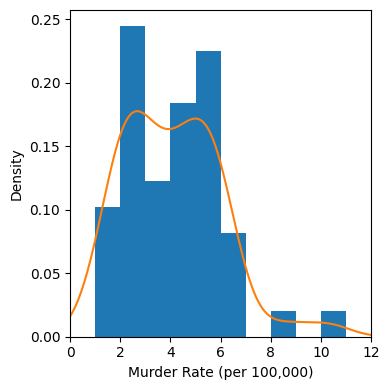

In [44]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

## Exploring Binary and Categorical Data

For **categorical data**, simple proportions or percentages effectively convey the story of the data. Summarizing a binary variable or a categorical variable with a few categories involves calculating the proportion of each category.

### Summarizing Binary and Categorical Variables

- **Binary Variables**: These have two categories, often represented as 0 and 1. Summarizing a binary variable typically involves determining the proportion of 1s (or 0s).
  
  **Example**:
  
  If you have a binary variable indicating whether a flight was delayed (`1`) or not (`0`), the summary could be the percentage of delayed flights.
  
  $$
  \text{Proportion of Delayed Flights} = \frac{\text{Number of Delayed Flights}}{\text{Total Number of Flights}} \times 100\%
  $$

- **Categorical Variables with Multiple Categories**: These variables have more than two categories. Summarizing them involves calculating the proportion or percentage for each category.
  

### Key Points

- **Proportions and Percentages**: Essential for summarizing and interpreting binary and categorical data.
- **Binary Variables**: Focus on the proportion of one category (e.g., proportion of successes vs. failures).
- **Multicategory Variables**: Calculate and compare the proportions of each category to understand the distribution.
- **Real-World Applications**: Used in various fields such as aviation, healthcare, marketing, and more to identify patterns and make informed decisions.

### Visualization Tips

- **Bar Charts**: Ideal for visualizing the proportions of different categories.
- **Pie Charts**: Useful for showing the percentage distribution of categories, though they are best used when there are limited categories.
- **Stacked Bar Charts**: Effective for comparing proportions across different groups or time periods.

Understanding how to summarize and visualize binary and categorical data is fundamental for effective data analysis, enabling clear communication of key insights and trends.



In [45]:
dfw = pd.read_csv('dfw_airline.csv')
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [46]:
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


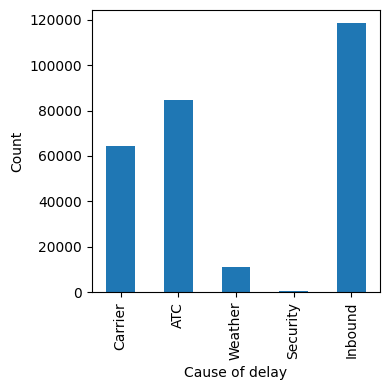

In [47]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [50]:
sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_px = pd.read_csv('sp500_data.csv.gz', index_col=0)

In [51]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [52]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The seaborn package provides a convenient implementation for heatmaps.

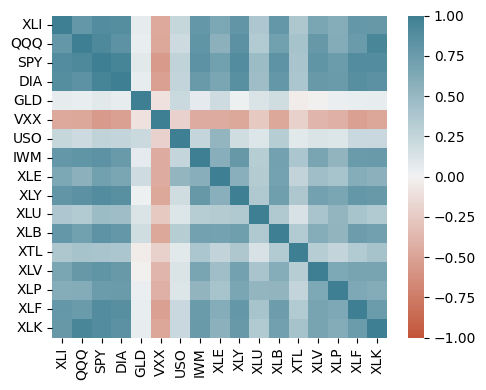

In [53]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

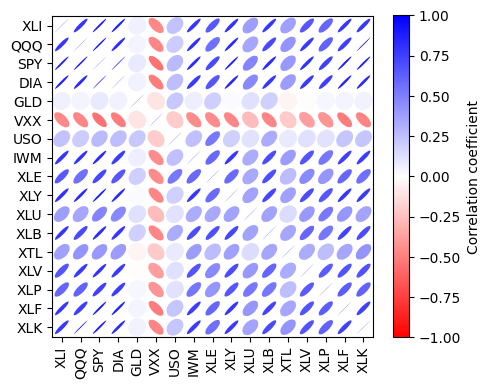

In [54]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = plt.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

##Scatterplots
Simple scatterplots are supported by pandas. Specifying the marker as `\u25EF` uses an open circle for each point.

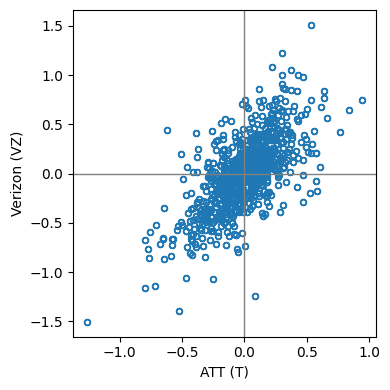

In [55]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_child2)


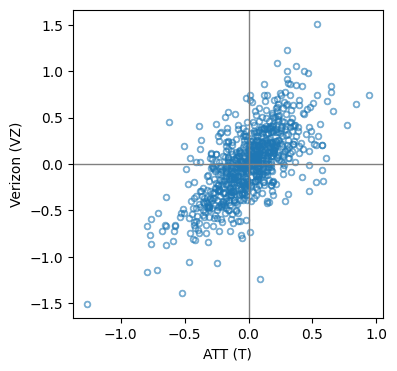

In [56]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

In [57]:
kc_tax = pd.read_csv('kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


Hexagonal binning and Contours
Plotting numeric versus numeric data
If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The hexbin method for pandas data frames is one powerful approach.

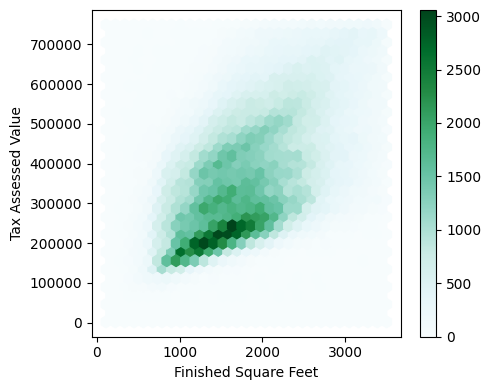

In [58]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

The seaborn kdeplot is a two-dimensional extension of the density plot. The calculation of the 2D-density for the full dataset takes several minutes. It is sufficient to create the visualization with a smaller sample of the dataset. With 10,000 data points, creating the graph takes only seconds. While some details may be lost, the overall shape is preserved.

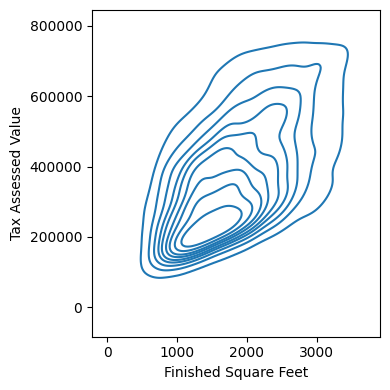

In [59]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [60]:
lc_loans = pd.read_csv('lc_loans.csv')
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [61]:
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [62]:
df = crosstab.copy().loc['A':'G',:].astype(float)
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


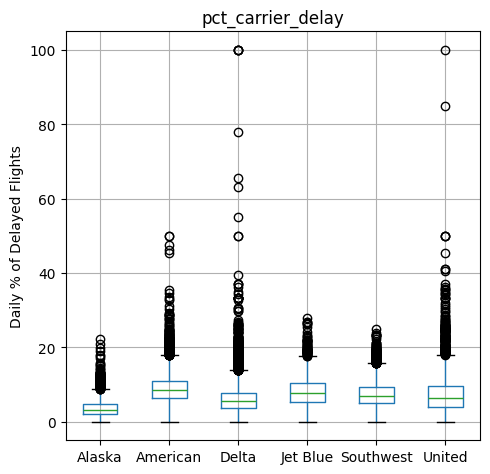

In [63]:
airline_stats = pd.read_csv('airline_stats.csv')
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

A violin plot, introduced by Hintze and Nelson in 1998, enhances the traditional boxplot by displaying the data's density on the y-axis. It mirrors and fills the density estimate to create a violin-shaped visualization, allowing it to reveal distribution details that boxplots might overlook.

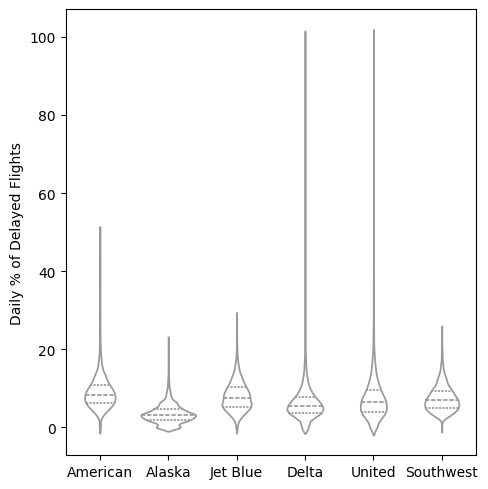

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

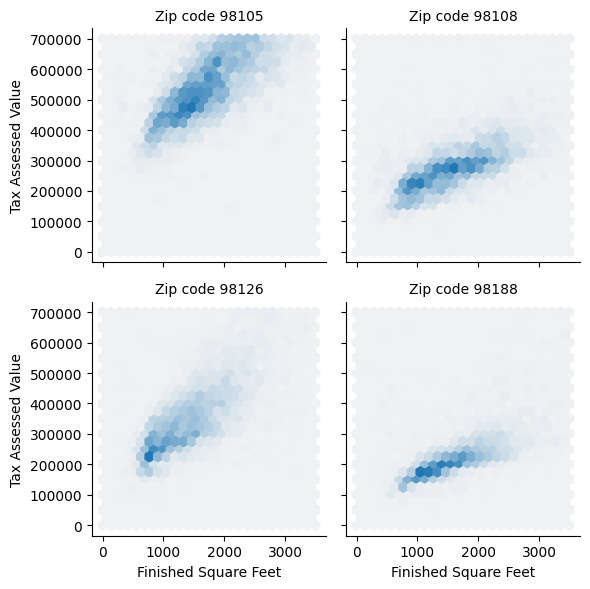

In [65]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

Exploratory data analysis (EDA), pioneered by John Tukey, set a foundation for the field of data science. The key idea of EDA is that the first and most important step in any project based on data is to look at the data. By summarizing and visualizing the data, you can gain valuable intuition and understanding of the project.